# **Zomato Restaurants Ratings**

## Table of Contents
<ul>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#explore">Exploratory Data Analysis</a></li>
<li><a href="#model">Model Building</a></li>
<li><a href="#conculsion">Conculsion</a></li>
<li><a href="#limitation">Limitations</a></li>
</ul>

### INTRODUCTION
#### Objectives
The objective of this project is to build machine learning approach to predict the rating of a restaurant in Bangalore.

#### About Dataset
The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted.

Data Source: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

Columns Description: The following are the description of each columns in the dataset:
- url: zomato url for the restaurants
- address: complete location of the restaurant
- name: name of the restaurant
- online_order: whether restaurant accepts online order
- book_table: whether restaurant provides option for booking table
- rate: restaurants rating on zomato website
- votes: number of individual who voted for restaurants
- phone: contact details of the restaurant
- localtion: area where restaurant is situated
- rest_type: Type of restaurants (Categorical value)
- dish_liked: what are all dishes of the restaurant that people liked
- cuisines: cuisines offered by the restaurant
- approx_cost(for two people): average cost for two people
- review_list: reviews of the restaurant on zomato website
- menu_item: menu items available in the restuarant
- listed_in(type): type of the restaurant
- listed_in(city): locality of the restaurant position

### Preliminary Wrangling

In [1]:
#IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


<a id='assessment'></a>
### Data Assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
#Reading unique values from 'rate' column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Assessment Results
- There are duplicate rows
- Unnecessary columns: `url, address, phone, dish_liked, reviews_list, menu_item, listed_in(city)`
- Unwanted values in the rate column ie `'NEW', '-'`
- The columns `rate, location, rest_type, cuisines, approx_cost(for two people)` has null values
- Rename columns: `approx_cost(for two people)` to `cost_for_2`, `listed_in(type)` to `type`, `listed_in(city)` to `city`
- The columns `rate`, `approx_cost(for two people)`  should be of datatype `float`

<a id='cleaning'></a>
### Data Cleaning

##### Drop unnecessary columns

In [7]:
unwanted_columns = ['url', 'address', 'phone', 'reviews_list', 'menu_item', 'listed_in(city)']
df.drop(unwanted_columns, axis=1, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


##### Replace 'NEW' and '-' in column `rate` to 'NaN'

In [11]:
df['rate'].replace(['NEW', '-'], np.nan, inplace=True)

##### Drop null values

In [9]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

##### Rename columns

In [13]:
df.rename(columns = {'approx_cost(for two people)':'cost_for_2',
                     'listed_in(type)':'type',
                     'listed_in(city)':'city'}, inplace=True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_2', 'type'],
      dtype='object')

##### Convert the columns `rate, cost_for_2` to datatype `float`
>   
     We remove '/5' from values in the rate column and then convert to float.
     We remove the ',' from values in the cost_for_2 column and then convert to float

In [34]:
# Removing '/5' from rate
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '') if isinstance(x, str) and '/5' in x else x).astype(float)
df['rate'].dtype

dtype('float64')

In [32]:
# Replacing ',' with empty string '' and converting to float
df['cost_for_2'] = df['cost_for_2'].apply(lambda x: x.replace(',', '') if isinstance(x, str) and ',' in x else x).astype(float)
df['cost_for_2'].dtype

dtype('float64')

In [33]:
df['cost_for_2']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost_for_2, Length: 51717, dtype: float64

In [13]:
# Save Cleaned Data
df.to_csv('Zomato_Clean.csv', index=False)

<a id='explore'></a>
### Exploratory Data Analysis

#### Most famous restaurants chain in Bangalore

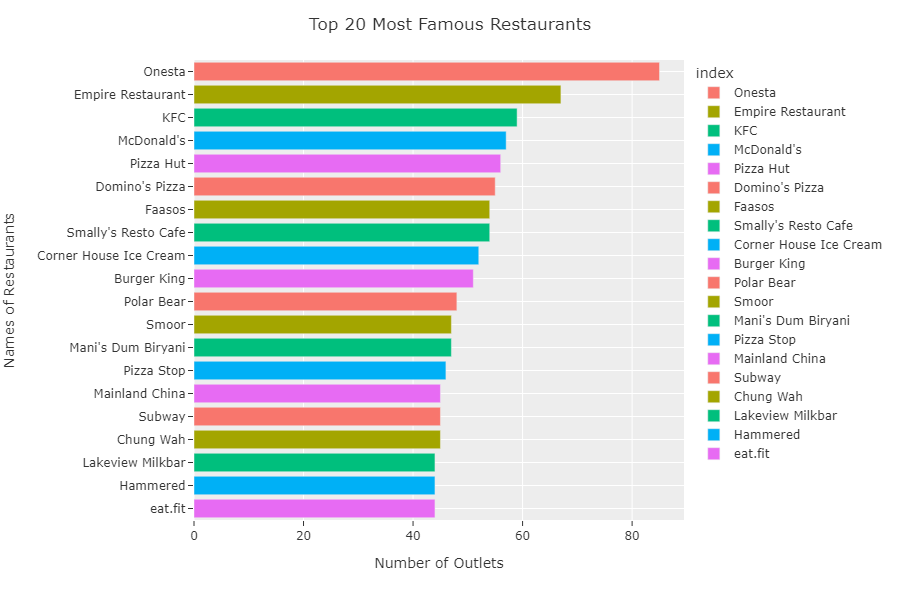

In [14]:
famous_count = df['name'].value_counts()[:20]
fig = px.bar(famous_count,
             x="name",
             y=famous_count.index,
             color=famous_count.index,
             template = 'ggplot2',
             height = 600,
            width = 900
            )

fig.update_layout(
    title = 'Top 20 Most Famous Restaurants',
    xaxis_title = 'Number of Outlets',
    yaxis_title = 'Names of Restaurants'
)
   
fig.show(renderer='png')

**Insight:** Cafe Coffee Day, Onesta and Empire Restaurant are the top 3 most popular restaurants in Bangalore

#### Table Booking 
> Percentage of restaurants that provides option for booking table

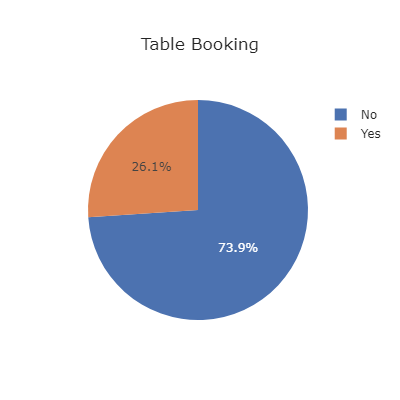

In [15]:
bk_table = df['book_table'].value_counts()
fig = px.pie(bk_table,
             values = bk_table,
             title = 'Table Booking',
             names = bk_table.index,
             height = 400,
             width = 400,
             template = 'seaborn'
            )
fig.show(renderer='png')

**Insight:** Most restaurant do not offer the option of booking a table.

#### Restaurants deliver online or Not

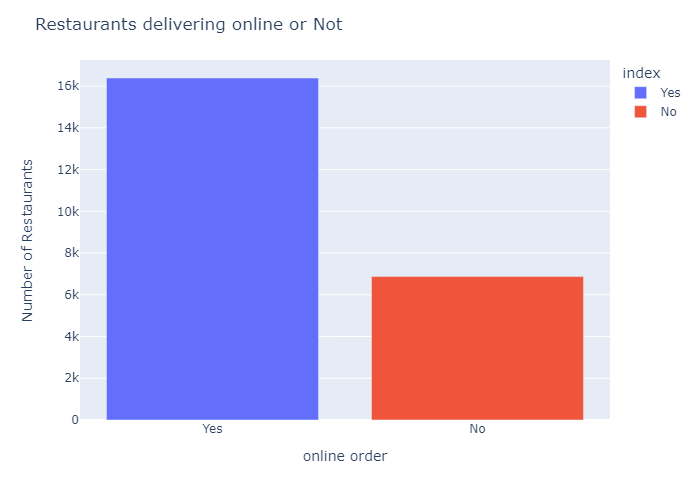

In [16]:
online_del = df['online_order'].value_counts()
fig = px.bar(online_del,
             y='online_order',
             x=online_del.index,
             color=online_del.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Restaurants delivering online or Not',
    yaxis_title = 'Number of Restaurants',
    xaxis_title = 'online order'
)
   
fig.show(renderer='png')

**Insight:** Most restaurant offers online order and delivery

#### Ratings Distribution

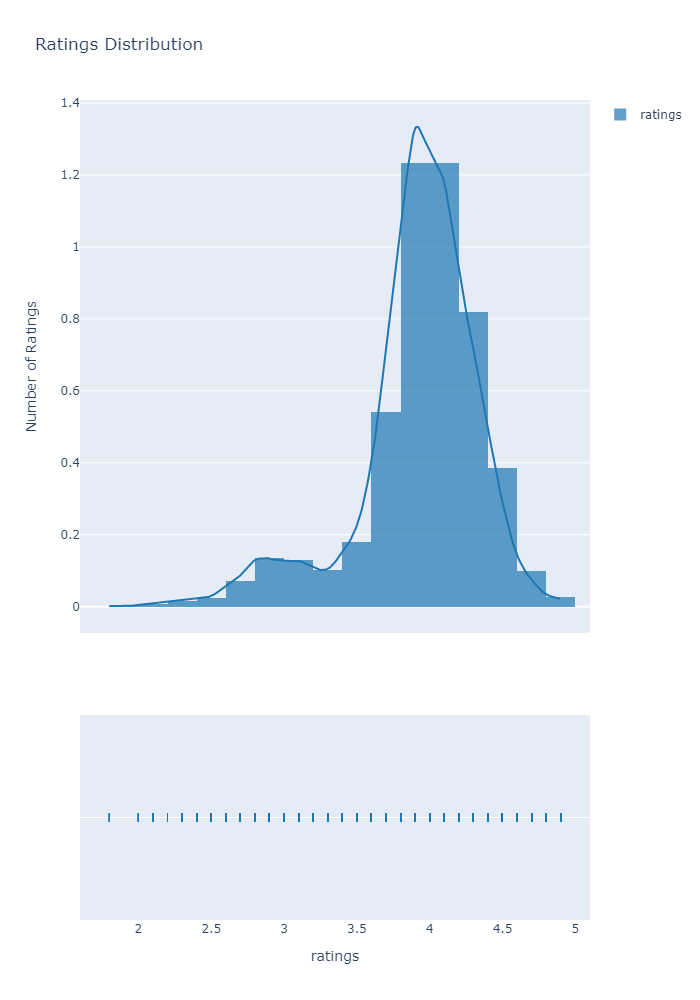

In [17]:
ratings = [df['rate'].values]
group_labels = ['ratings']
fig = ff.create_distplot(ratings, group_labels,
                        bin_size= 0.2)

fig.update_layout(
    height = 1000,
    width = 700,
    title = 'Ratings Distribution',
    yaxis_title = 'Number of Ratings',
    xaxis_title = 'ratings'
)

fig.show(renderer='png')

**Insight:** Most ratings are between 3.0 and 4.5

#### Service Types

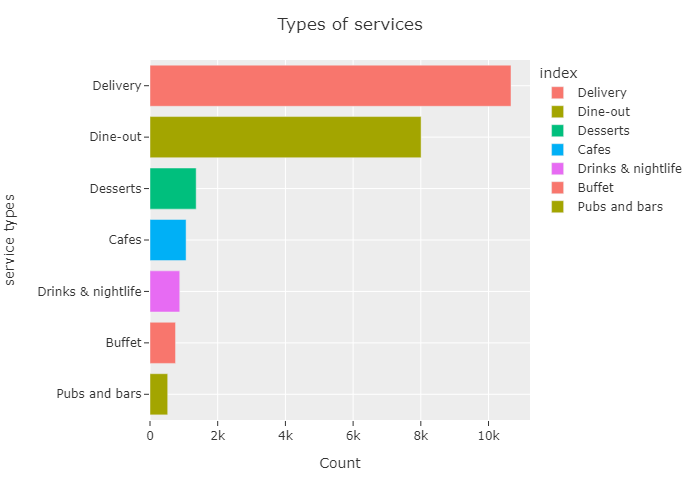

In [18]:
service = df['type'].value_counts()
fig = px.bar(service,
             x='type',
             y=service.index,
             color= service.index,
             template = 'ggplot2',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Types of services',
    xaxis_title = 'Count',
    yaxis_title = 'service types'
)
   
fig.show(renderer='png')

**Insight:** Here the two main service types are Delivery and Dine-out

#### Distribution of charges

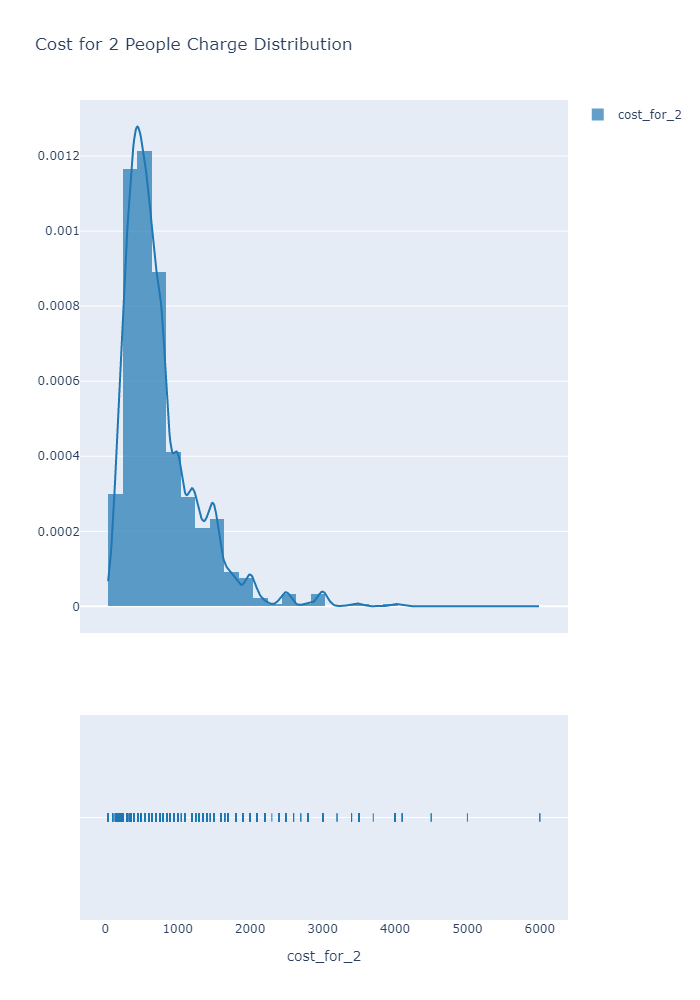

In [19]:
cost = [df['cost_for_2'].values]
group_labels = ['cost_for_2']
fig = ff.create_distplot(cost, group_labels,
                        bin_size= 200)

fig.update_layout(
    height = 1000,
    width = 700,
    title = 'Cost for 2 People Charge Distribution',
    xaxis_title = 'cost_for_2'
)

fig.show(renderer='png')

**Insight:** Majority of restaurants charges less than 2000 for two people 

#### Most Liked Dishes

In [20]:
likes = []
for i in range(df.shape[0]):
    dish = df['dish_liked'][i]
    if ',' in dish:
        split_ = dish.split(',')
        for item in split_:
            likes.append(item)
    else:
        likes.append(dish)

In [21]:
favorite_food = pd.Series(likes).value_counts()
favorite_food.head(10)

 Pasta         2695
 Pizza         1916
 Cocktails     1882
 Burgers       1738
 Mocktails     1623
 Biryani       1309
 Sandwiches    1287
Burgers        1256
 Coffee        1184
 Nachos        1171
dtype: int64

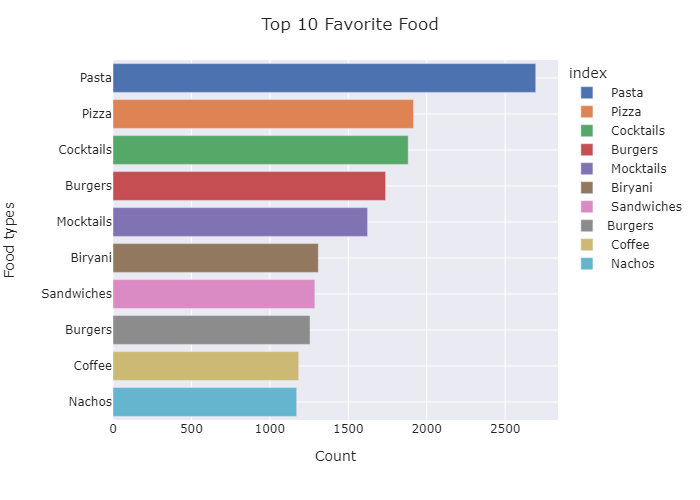

In [22]:
fav_10 = favorite_food[:10]
fig = px.bar(fav_10,
             x= fav_10,
             y=fav_10.index,
             color= fav_10.index,
             template = 'seaborn',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Favorite Food',
    xaxis_title = 'Count',
    yaxis_title = 'Food types'
)
   
fig.show(renderer='png')

**Insight:** Five most liked dishes are Pasta, Pizza, Cocktails, Burger, Mocktails.

#### Most Popular Restaurant Types

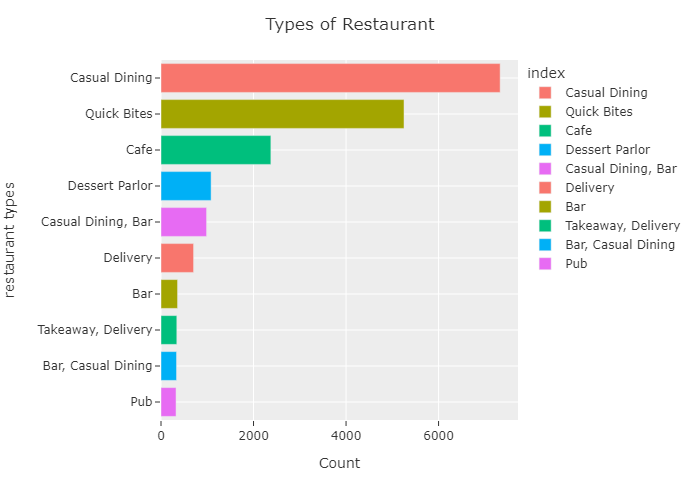

In [23]:
rest = df['rest_type'].value_counts()[:10]
fig = px.bar(rest,
             x='rest_type',
             y=rest.index,
             color= rest.index,
             template = 'ggplot2',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Types of Restaurant',
    xaxis_title = 'Count',
    yaxis_title = 'restaurant types'
)
   
fig.show(renderer='png')

**Insight:** The 3 most common type of restaurants in Bangalore are Casual Dining, Quick Bites and Cafe

<a id='model'></a>
## Model Building
In this section we would so some more preprocessing and build a regresion model to predict the rating of a restaurant

In [14]:
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go

import pickle

rs = 123

##### Define a function to return root-mean squared error(RMSE)

In [15]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

##### Read Cleaned Data

In [18]:
data = pd.read_csv('Zomato_Clean.csv')
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet


### Preprocessing

##### Drop unnecessary columns

In [19]:
data = data.drop(['name', 'type'], axis=1)
data.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0


##### Convert the online categoriccal variables into a numeric format

In [20]:
data['online_order'] = data['online_order'].map({'Yes': 1, 'No': 0})

In [21]:
data['online_order'] = pd.to_numeric(data['online_order'])

In [22]:
data['online_order'].value_counts()

1    27102
0    14161
Name: online_order, dtype: int64

##### Change string categorical into a categorical int

In [23]:
data['book_table'] = data['book_table'].map({'Yes': 1, 'No': 0})

In [24]:
data['book_table'] = pd.to_numeric(data['book_table'])

In [25]:
data['book_table'].value_counts()

0    34959
1     6304
Name: book_table, dtype: int64

##### label encode the categorical variables to make it easier to build algorithm
- location
- rest_type
- cuisines

In [26]:
data['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
41258                    Whitefield
41259                    Whitefield
41260                    Whitefield
41261    ITPL Main Road, Whitefield
41262    ITPL Main Road, Whitefield
Name: location, Length: 41263, dtype: object

Location

In [27]:
# Initialize the LabelEncoder
location_encoder = LabelEncoder()

# Fit and transform the LabelEncoder
location_encoder.fit(data['location'])
data['location'] = location_encoder.transform(data['location'])

# Save the label encoder
with open('location_encoder.pickle', 'wb') as handle:
    pickle.dump(location_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
# Initialize the LabelEncoder
RestType_encoder = LabelEncoder()

# Fit and transform the LabelEncoder
RestType_encoder.fit(data['rest_type'])
data['rest_type'] = RestType_encoder.transform(data['rest_type'])

# Save the label encoder
with open('RestType_encoder.pickle', 'wb') as handle:
    pickle.dump(RestType_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
# Initialize the LabelEncoder
cuisines_encoder = LabelEncoder()

# Fit and transform the LabelEncoder
cuisines_encoder.fit(data['cuisines'])
data['cuisines'] = cuisines_encoder.transform(data['cuisines'])

# Save the label encoder
with open('cuisines_encoder.pickle', 'wb') as handle:
    pickle.dump(cuisines_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
# # Load the label encoder
# with open('location_encoder.pickle', 'rb') as l_handle:
#     location_encoder = pickle.load(l_handle)

# # Load the label encoder
# with open('RestType_encoder.pickle', 'rb') as l_handle:
#     RestType_encoder = pickle.load(l_handle)
    
# # Load the label encoder
# with open('cuisines_encoder.pickle', 'rb') as l_handle:
#     cuisines_encoder = pickle.load(l_handle)

In [31]:
data.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2
0,1,1,4.1,775,1,24,1894,800.0
1,1,0,4.1,787,1,24,816,800.0
2,1,0,3.8,918,1,19,653,800.0


### Splitting data

##### Split data into features(X) and targets(Y)

In [32]:
X = data.drop(['rate'], axis=1)
Y = data['rate']

##### split data into training and test set

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state = rs)

### Define Function for plotting results distribution

In [34]:
def distributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=RedFunction, histnorm='probability', name=RedName, marker_color='red'))
    fig.add_trace(go.Histogram(x=BlueFunction, histnorm='probability', name=BlueName, marker_color='blue'))

    fig.update_layout(
        title=Title,
        xaxis_title='ratings',
        yaxis_title='count',
        barmode='overlay'
    )

    fig.show(renderer='png')


### Linear Regression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.3055569166457742

**INSIGHT:**
- We can see that a simple linear regression model do not fit well with this problem so we try other advanced model.

### Random Forest Regressor

In [37]:
# Instantiate model
RF_model = RandomForestRegressor(n_estimators= 650,
                                 random_state= rs, min_samples_leaf = 0.0001)
# Train model
RF_model.fit(x_train, y_train)
# # Make prediction
y_predict = RF_model.predict(x_test)
# score model
rf_score = round(r2_score(y_test, y_predict), 4)
print('r2 score: {}'.format(rf_score))

r2 score: 0.8829


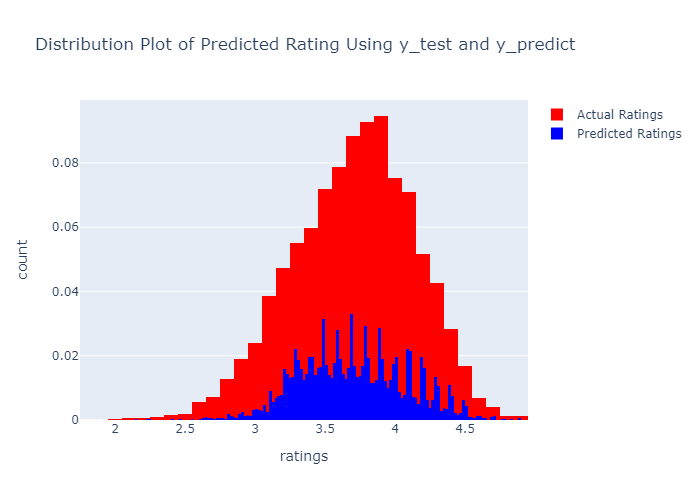

In [38]:
# Visualize results
Title = "Distribution Plot of Predicted Rating Using y_test and y_predict"
distributionPlot(y_test, y_predict, "Actual Ratings", "Predicted Ratings", Title)

### Extra Tree Regressor

In [39]:
# Instantiate model
ET_model = ExtraTreesRegressor(n_estimators= 120)
# Train model
ET_model.fit(x_train, y_train)
# Make prediction
y_predict = ET_model.predict(x_test)
# score model
ext_score = round(r2_score(y_test, y_predict), 4)
print('r2 score: {}'.format(ext_score))

r2 score: 0.9349


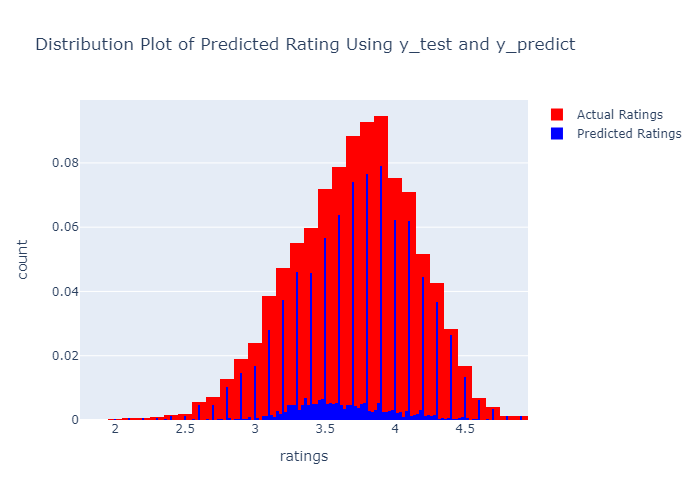

In [40]:
# Visualize results
Title = "Distribution Plot of Predicted Rating Using y_test and y_predict"
distributionPlot(y_test, y_predict, "Actual Ratings", "Predicted Ratings", Title)

### Results

In [41]:
row = [[rf_score], [ext_score]]
index = ['RandomForest', 'ExtraTrees']
columns = ['r2_score']
result_df = pd.DataFrame(row, columns =columns, index=index)
result_df = result_df.sort_values(by='r2_score', ascending=False)
result_df

,r2_score
ExtraTrees,0.9349
RandomForest,0.8829


##### Visualizing results

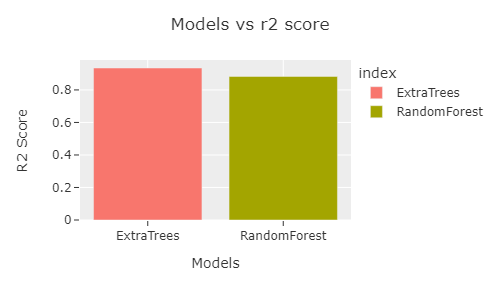

In [42]:
fig = px.bar(result_df,
             y='r2_score',
             x=result_df.index,
             color=result_df.index,
             template = 'ggplot2',
             height = 300,
            width = 500
            )

fig.update_layout(
    title = 'Models vs r2 score',
    yaxis_title = 'R2 Score',
    xaxis_title = 'Models'
)
   
fig.show(renderer='png')

### Save our model

In [43]:
import pickle
pickle.dump(ET_model, open('model.pkl','wb'))
# model = pickle.load(open('model.pkl','rb'))

<a id='conclusion'></a>
### Conclusion
> - The Extra Tree Regressor produced the best result with an `r2 score` of `9396`

<a id='limitation'></a>
### Limitations
> - The dataset contained null values which was dropped during the cleaning procedure
> - Our visualization and analysis is limited to only the provided dataset.

### Appendix
> - Cafe Coffee Day, Onesta and Empire Restaurant are the top 3 most popular restaurants in Bangalore
> - Most restaurant do not offer the option of booking a table.
> - Most restaurant offers online order and delivery
> - Most ratings are between 3.0 and 4.5
> - Here the two main service types are Delivery and Dine-out
> - Majority of restaurants charges less than 2000 for two people
> - Five most liked dishes are Pasta, Pizza, Cocktails, Burger, Mocktails.
> - The 3 most common type of restaurants in Bangalore are Casual Dining, Quick Bites and Cafe.